### Boxcox transformation

Boxcox return a positive dataset transformed by a Box-Cox power transformation. Useful for transforming a skewed continuous non-negative with a non-normal distribution sample into a "more normal" one with less skeweness

*"Another important use of variable transformation is to eliminate skewness and other distributional features that complicate analysis. Often the goal is to find a simple transformation that leads to normality. "*

- Nice doc http://onlinestatbook.com/2/transformations/box-cox.html
- How to use Boxcox from scipy https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.boxcox.html

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = np.genfromtxt("nonnormal.csv", names=True, delimiter="\n")

Get rid of the negative values by shifting the whole data set to the positive domain

In [3]:
shift = np.abs(np.floor(min(data["x"])))

Original data hist plot

(array([   1.,    0.,    0.,    0.,    0.,    0.,    4.,    1.,    6.,
          10.,   16.,   24.,   36.,   57.,   80.,  105.,  135.,  185.,
         237.,  252.,  215.,  220.,  227.,  451.,  477.,  211.,   34.,
          10.,    3.,    3.]),
 array([-13.02781436, -10.63652586,  -8.24523735,  -5.85394885,
         -3.46266034,  -1.07137184,   1.31991667,   3.71120517,
          6.10249368,   8.49378218,  10.88507069,  13.27635919,
         15.6676477 ,  18.0589362 ,  20.45022471,  22.84151321,
         25.23280171,  27.62409022,  30.01537872,  32.40666723,
         34.79795573,  37.18924424,  39.58053274,  41.97182125,
         44.36310975,  46.75439826,  49.14568676,  51.53697527,
         53.92826377,  56.31955228,  58.71084078]),
 <a list of 30 Patch objects>)

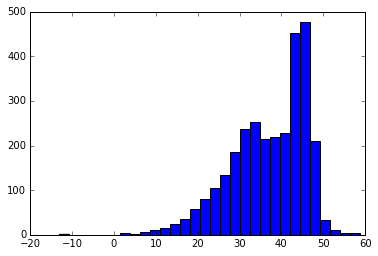

In [4]:
plt.hist(data["x"], bins=30)

In [5]:
labmda_auto = stats.boxcox(data["x"]+shift)[1]
print("The automatic selected lambda is: " + str(round(labmda_auto, 4)))
data_coxbox = stats.boxcox(data["x"]+shift)[0]

The automatic selected lambda is: 2.5962


In [25]:
print("Skewness of the dataset before was: " + str(stats.skew(data["x"])))
print("Skewness of the dataset aftex applying boxcox is: " + str(stats.skew(data_coxbox)))

Skewness of the dataset before was: -0.799505835826
Skewness of the dataset aftex applying boxcox is: -0.181437562321


A negative skew means that there is more weight on the right tail of the distribution. 0 means no skewness (perfect normal distribution).

(array([   6.,   21.,   40.,   59.,   94.,  115.,  135.,  169.,  183.,
         204.,  173.,  159.,  148.,  116.,  147.,  229.,  270.,  287.,
         216.,  131.,   57.,   18.,    7.,    6.,    3.,    1.,    1.,
           2.,    1.,    2.]),
 array([ -2.72003481e-02,   8.74163087e+02,   1.74835337e+03,
          2.62254366e+03,   3.49673395e+03,   4.37092424e+03,
          5.24511452e+03,   6.11930481e+03,   6.99349510e+03,
          7.86768539e+03,   8.74187567e+03,   9.61606596e+03,
          1.04902562e+04,   1.13644465e+04,   1.22386368e+04,
          1.31128271e+04,   1.39870174e+04,   1.48612077e+04,
          1.57353980e+04,   1.66095883e+04,   1.74837785e+04,
          1.83579688e+04,   1.92321591e+04,   2.01063494e+04,
          2.09805397e+04,   2.18547300e+04,   2.27289203e+04,
          2.36031106e+04,   2.44773008e+04,   2.53514911e+04,
          2.62256814e+04]),
 <a list of 30 Patch objects>)

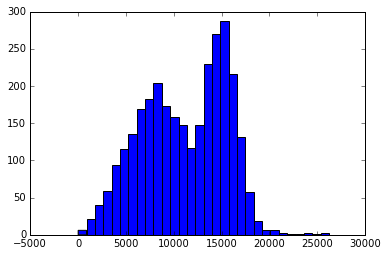

In [6]:
plt.hist(data_coxbox, bins=30)

With simple algebra, we see how to calculate the inverse of the boxcox function, which looks like: f(X) = (X^lambda - 1)/lambda

In [39]:
def reverse_boxcox(data, lambda_, shift):
    result = ((data*lambda_)+1) ** (1/lambda_) - shift
    return result

In [35]:
print("Skewness of the dataset before was: " + str(stats.skew(data["x"])))
print("Skewness of the dataset aftex applying boxcox is: " + str(stats.skew(data_coxbox)))

Skewness of the dataset before was: -0.799505835826
Skewness of the dataset aftex applying boxcox is: -0.181437562321


(array([   1.,    0.,    0.,    0.,    0.,    0.,    4.,    1.,    6.,
          10.,   16.,   24.,   36.,   57.,   80.,  105.,  135.,  185.,
         237.,  252.,  215.,  220.,  227.,  451.,  477.,  211.,   34.,
          10.,    3.,    3.]),
 array([-13.02781436, -10.63652586,  -8.24523735,  -5.85394885,
         -3.46266034,  -1.07137184,   1.31991667,   3.71120517,
          6.10249368,   8.49378218,  10.88507069,  13.27635919,
         15.6676477 ,  18.0589362 ,  20.45022471,  22.84151321,
         25.23280171,  27.62409022,  30.01537872,  32.40666723,
         34.79795573,  37.18924424,  39.58053274,  41.97182125,
         44.36310975,  46.75439826,  49.14568676,  51.53697527,
         53.92826377,  56.31955228,  58.71084078]),
 <a list of 30 Patch objects>)

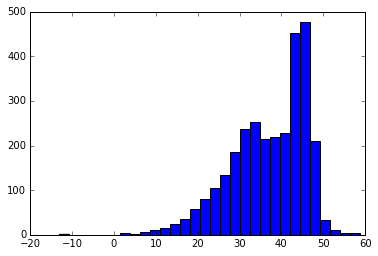

In [40]:
testd = reverse_boxcox(data_coxbox, labmda_auto, shift)
plt.hist(testd, bins=30)